In [1]:
from header import *
import scipy.constants as cnst
import matplotlib.pyplot as plt

# --- constants --- 

#masses of nuclear particles:
        
#mass of the alpha particle
m1=(cnst.physical_constants['alpha particle mass'][0])*(10**(-12))**2/cnst.eV

#mass of the muon
m2=(cnst.physical_constants['muon mass'][0])*(10**(-12))**2/cnst.eV

#mass of the electron
m3=cnst.m_e*(10**(-12))**2/cnst.eV

m2=m3

#hbar
hbar=cnst.hbar/cnst.eV

#elementry charge
e=cnst.e

#vacume permiativity
epsilon0=(cnst.physical_constants['vacuum electric permittivity'][0])*(10**(-12))*cnst.eV




def N_func(i,j,alphas,betas,gammas):
        
    return (8*np.sqrt(np.abs(alphas[i])*np.abs(betas[i])*np.abs(gammas[i])*np.abs(alphas[j])*np.abs(betas[j])*np.abs(gammas[j]))/((np.conj(alphas[i])+alphas[j])*(np.conj(betas[i])+betas[j])*(np.conj(gammas[i])+gammas[j])))**3


def twocostheta(A,B,C):
	
	return 3*B/(2*A)+3*A/(2*B)-3*A*B/(C**2)
		

def H_func(i,j,alphas,betas,gammas):

	T=-0.5*hbar**2*(
            (alphas[j]**2+betas[j]**2)/m1  +  (alphas[j]**2+gammas[j]**2)/m2  +  (betas[j]**2+gammas[j]**2)/m3
            
            -2*alphas[j]*(1/m1+1/m2)*(np.conj(alphas[i])+alphas[j])/2
			-2*betas[j]*(1/m1+1/m3)*(np.conj(betas[i])+betas[j])/2	  
			-2*gammas[j]*(1/m2+1/m3)*(np.conj(gammas[i])+gammas[j])/2	  
                  
			+alphas[j]*betas[j]/m1*twocostheta(np.conj(alphas[i])+alphas[j],np.conj(betas[i])+betas[j],np.conj(gammas[i])+gammas[j])
			+alphas[j]*gammas[j]/m2*twocostheta(np.conj(betas[i])+betas[j],np.conj(gammas[i])+gammas[j],np.conj(alphas[i])+alphas[j])
			+betas[j]*gammas[j]/m3*twocostheta(np.conj(alphas[i])+alphas[j],np.conj(gammas[i])+gammas[j],np.conj(betas[i])+betas[j])

			)
      
	
	V=(e**2/(4*np.pi*epsilon0))*(-(np.conj(alphas[i])+alphas[j])-(np.conj(betas[i])+betas[j])+0.5*(np.conj(gammas[i])+gammas[j]))

	return (T+V)*N_func(i,j,alphas,betas,gammas)

In [2]:
a0=cnst.physical_constants["Bohr radius"][0]*10**12
print(a0)

52.9177210544


In [3]:
kappas=np.linspace(0.3,6,1000)
params=(1/(a0*kappas))*np.array([[[1]],[[1]],[[1]]])

In [4]:
print(params.shape)

(3, 1, 1000)


In [5]:
subspace=Subspace(1)
subspace.set_params(1000,params)
subspace.set_H_func(H_func)
subspace.set_N_func(N_func)

In [6]:
subspace.make_N_mats()
subspace.make_H_mats()
subspace.find_N_eigens()
subspace.make_Y_mats()
subspace.make_invs_sqrt_beta_mats()
subspace.make_P_mats()
subspace.find_P_eigens()
subspace.find_energy_levels()

Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.


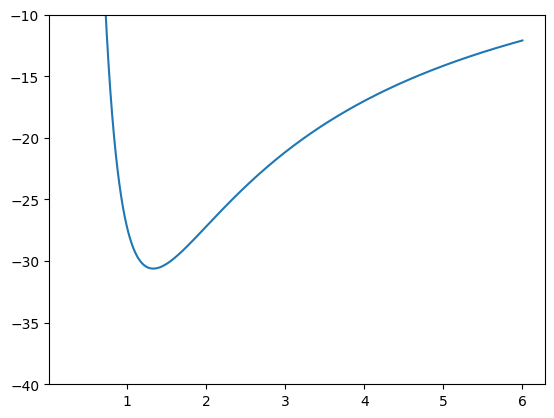

In [15]:
plt.plot(kappas,subspace.energy_levels[:,0])
plt.ylim([-40,-10])
plt.show()

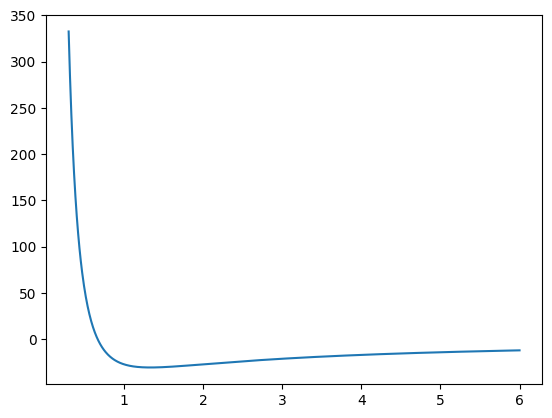

In [8]:
plt.plot(kappas,subspace.H_func(0,0,*params))
plt.show()

In [9]:
params2=(1/(a0*kappas))*np.array([
    [[0.5],[1],[2]],
    [[0.5],[1],[2]],
    [[0.5],[1],[2]]])

In [10]:
print(params2.shape)

(3, 3, 1000)


In [11]:
subspace2=Subspace(3)
subspace2.set_N_func(N_func)
subspace2.set_H_func(H_func)
subspace2.set_params(1000,params2)

In [12]:
subspace2.make_N_mats()
subspace2.make_H_mats()
subspace2.find_N_eigens()
subspace2.make_Y_mats()
subspace2.make_invs_sqrt_beta_mats()
subspace2.make_P_mats()
subspace2.find_P_eigens()
subspace2.find_energy_levels()

Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.


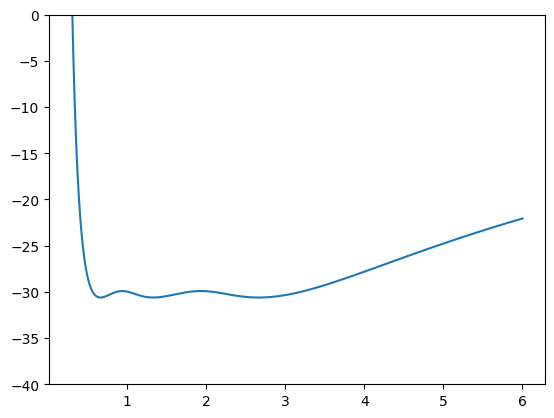

In [13]:
plt.plot(kappas,subspace2.energy_levels[:,0])
plt.ylim([-40,0])
plt.show()

In [16]:
print(params.shape)

(3, 1, 1000)


In [20]:
print(params[0,0,10])

0.052925046251244036
